### Earth

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

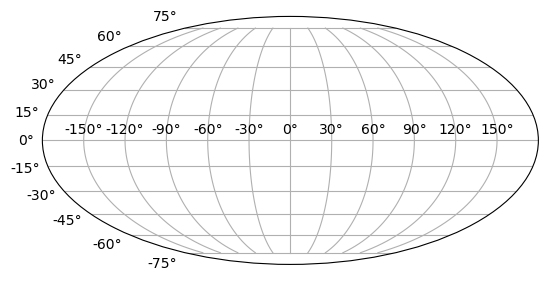

In [2]:
plt.subplot(projection="mollweide")
plt.grid(True)

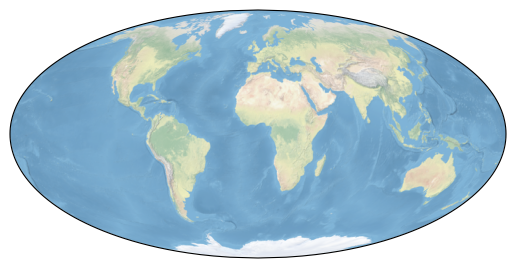

In [3]:
plt.subplot(projection=ccrs.Mollweide()).stock_img()

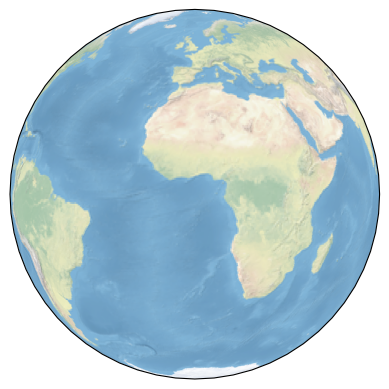

In [4]:
plt.subplot(projection=ccrs.Orthographic()).stock_img()

### Blue Marble

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [6]:
img = plt.imread('img/blue_marble.png')

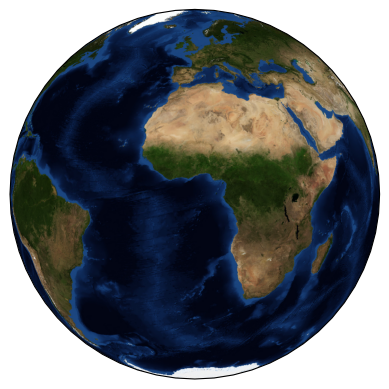

In [7]:
plt.subplot(projection=ccrs.Orthographic())
plt.imshow(img,transform=ccrs.PlateCarree())

### ETOPO 1

In [41]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [42]:
img=plt.imread('img/etopo.png')

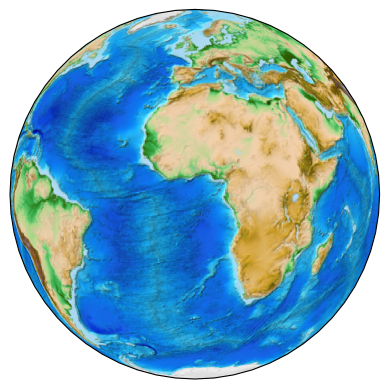

In [43]:
plt.subplot(projection=ccrs.Orthographic())
plt.imshow(img,transform=ccrs.PlateCarree())

### Plot lines & points on map

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [30]:
London = [51.53, -0.08]
Tokyo =  [35.66, 139.66]

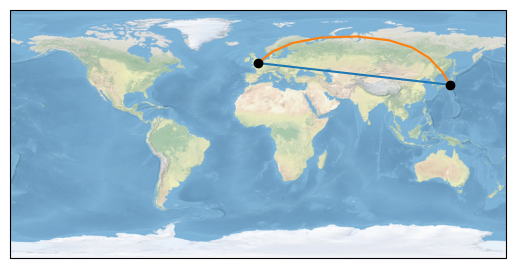

In [33]:
plt.subplot(projection=ccrs.PlateCarree()).stock_img()
# lines - plot([lonA,lonB],[latA,latB])
plt.plot([London[1],Tokyo[1]],[London[0],Tokyo[0]],transform=ccrs.PlateCarree())
plt.plot([London[1],Tokyo[1]],[London[0],Tokyo[0]],transform=ccrs.Geodetic())
# points - plot([lonA,latA])
plt.plot(London[1],London[0],'o',transform=ccrs.PlateCarree(),color='k')
plt.plot(Tokyo[1],Tokyo[0],'o',transform=ccrs.PlateCarree(),color='k')

### Maps

In [63]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

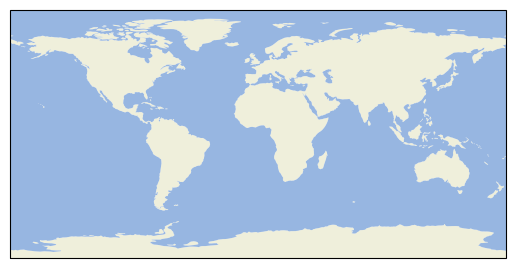

In [62]:
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.LAND)
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.OCEAN)

In [37]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

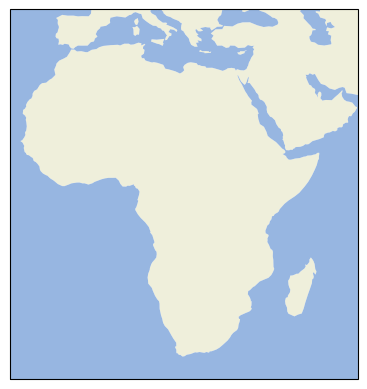

In [46]:
plt.subplot(projection=ccrs.PlateCarree()).set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.LAND)
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.OCEAN)

In [56]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs

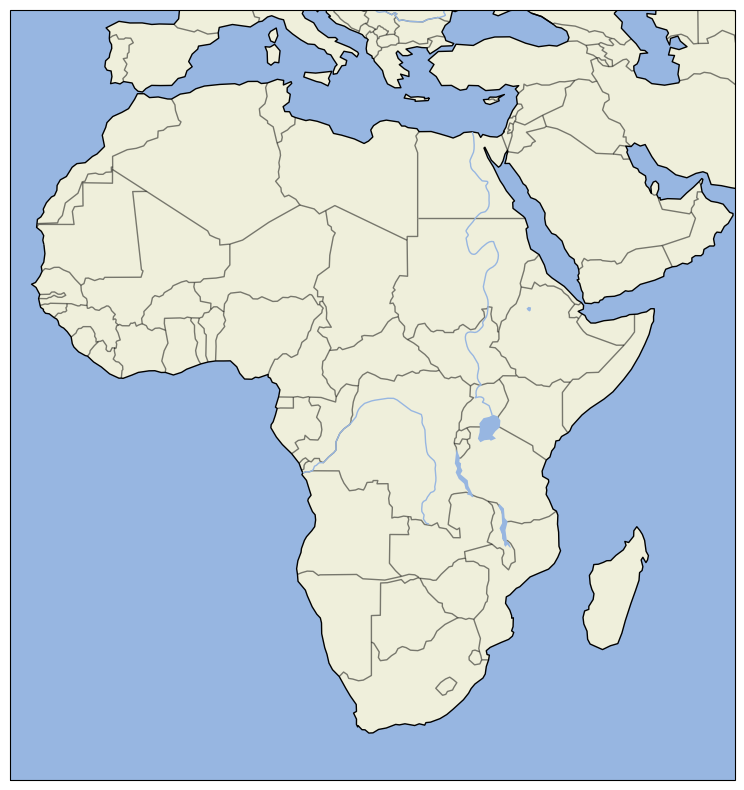

In [58]:
plt.figure(figsize=(10, 10))
plt.subplot(projection=ccrs.PlateCarree()).set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.LAND)
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.OCEAN)
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.COASTLINE)
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.BORDERS, linestyle='-',  alpha=0.5)
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.LAKES)
plt.subplot(projection=ccrs.PlateCarree()).add_feature(cfeature.RIVERS)

### Plotting data on map

In [1]:
from bs4 import BeautifulSoup as bs4
import pandas as pd
import requests

In [69]:
request=requests.get('https://en.wikipedia.org/wiki/List_of_communes_in_France_with_over_20,000_inhabitants')
html=str(bs4(request.content).table)
df=pd.DataFrame(pd.read_html(html)[0])
df.head()

Commune        Department                      Region Population, 2006  \
0      Paris             Paris               Île-de-France          2181371   
1  Marseille  Bouches-du-Rhône  Provence-Alpes-Côte d'Azur           839043   
2       Lyon   Lyon Metropolis        Auvergne-Rhône-Alpes           472305   
3   Toulouse     Haute-Garonne                   Occitanie           437715   
4       Nice   Alpes-Maritimes  Provence-Alpes-Côte d'Azur           347060   

   Population, 2013 Population, 2019  Rank 2019  
0         2229621.0          2165423          1  
1          855393.0           870731          2  
2          500715.0           522969          3  
3          458298.0           493465          4  
4          342295.0           342669          5

In [70]:
df50=df.nsmallest(50,['Rank 2019'])

In [71]:
df50.dtypes

Commune              object
Department           object
Region               object
Population, 2006     object
Population, 2013    float64
Population, 2019     object
Rank 2019             int64
dtype: object

In [72]:
df50['Population, 2019']=pd.to_numeric(df50['Population, 2019'])

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

<Axes: xlabel='Rank 2019', ylabel='Population, 2019'>

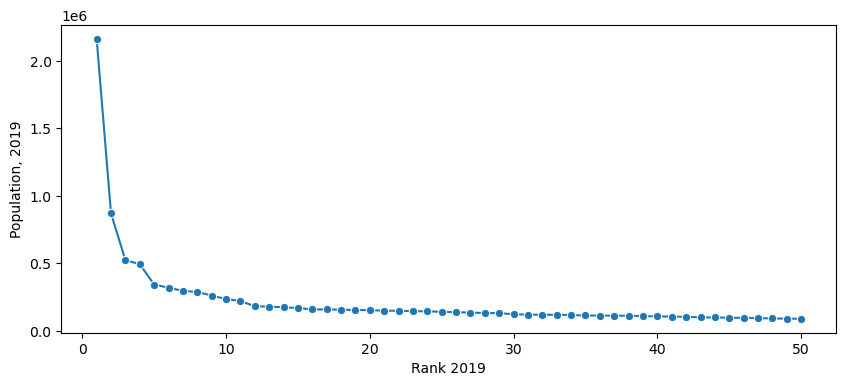

In [74]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Rank 2019',y='Population, 2019',marker='o',data=df50)

Text(0.5, 0, 'cities')

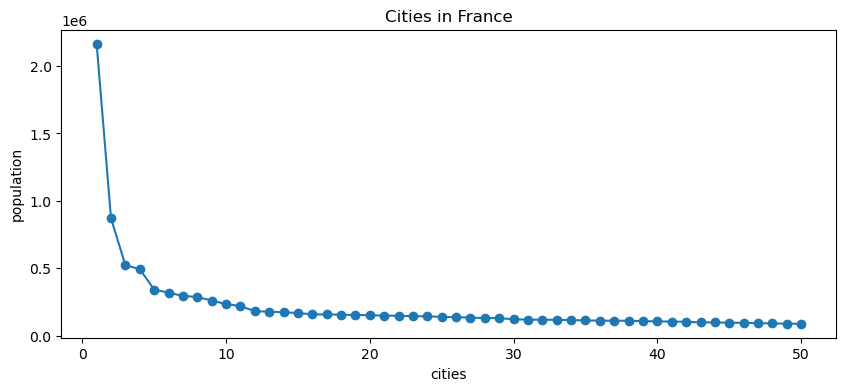

In [75]:
plt.figure(figsize=(10,4))
plt.plot(df50['Rank 2019'],df50['Population, 2019'],marker='o')
plt.title('Cities in France')
plt.ylabel('population')
plt.xlabel('cities')

Text(0.5, 0, 'cities')

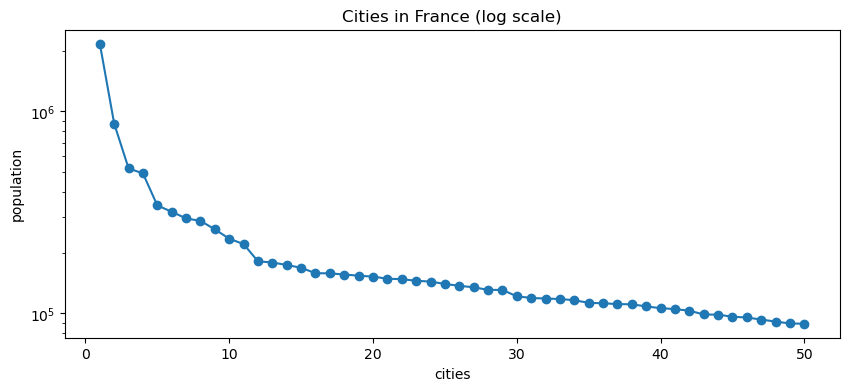

In [76]:
plt.figure(figsize=(10,4))
plt.plot(df50['Rank 2019'],df50['Population, 2019'],marker='o')
plt.yscale('log')
plt.title('Cities in France (log scale)')
plt.ylabel('population')
plt.xlabel('cities')

In [77]:
import geocoder

In [78]:
g = geocoder.osm('Paris')
g.latlng

[48.8534951, 2.3483915]

In [81]:
df50['latitude']=''
df50['longitude']=''
for i in range(len(df50)):
    df50['latitude'].loc[i]=geocoder.osm(df['Commune'].loc[i]).latlng[0]
    df50['longitude'].loc[i]=geocoder.osm(df['Commune'].loc[i]).latlng[1]
df50.to_csv('data/cities.csv')

C:\Users\pk764\AppData\Local\Temp\ipykernel_22276\4286945839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df50['latitude'].loc[i]=geocoder.osm(df['Commune'].loc[i]).latlng[0]
C:\Users\pk764\AppData\Local\Temp\ipykernel_22276\4286945839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df50['longitude'].loc[i]=geocoder.osm(df['Commune'].loc[i]).latlng[1]


In [82]:
df50.dtypes

Commune              object
Department           object
Region               object
Population, 2006     object
Population, 2013    float64
Population, 2019      int64
Rank 2019             int64
latitude             object
longitude            object
dtype: object

In [83]:
df50['latitude']=pd.to_numeric(df50['latitude'])
df50['longitude']=pd.to_numeric(df50['longitude'])

In [84]:
df50.head()

Commune        Department                      Region Population, 2006  \
0      Paris             Paris               Île-de-France          2181371   
1  Marseille  Bouches-du-Rhône  Provence-Alpes-Côte d'Azur           839043   
2       Lyon   Lyon Metropolis        Auvergne-Rhône-Alpes           472305   
3   Toulouse     Haute-Garonne                   Occitanie           437715   
4       Nice   Alpes-Maritimes  Provence-Alpes-Côte d'Azur           347060   

   Population, 2013  Population, 2019  Rank 2019   latitude  longitude  
0         2229621.0           2165423          1  48.853495   2.348391  
1          855393.0            870731          2  43.296174   5.369953  
2          500715.0            522969          3  45.757814   4.832011  
3          458298.0            493465          4  43.604462   1.444247  
4          342295.0            342669          5  43.700936   7.268391

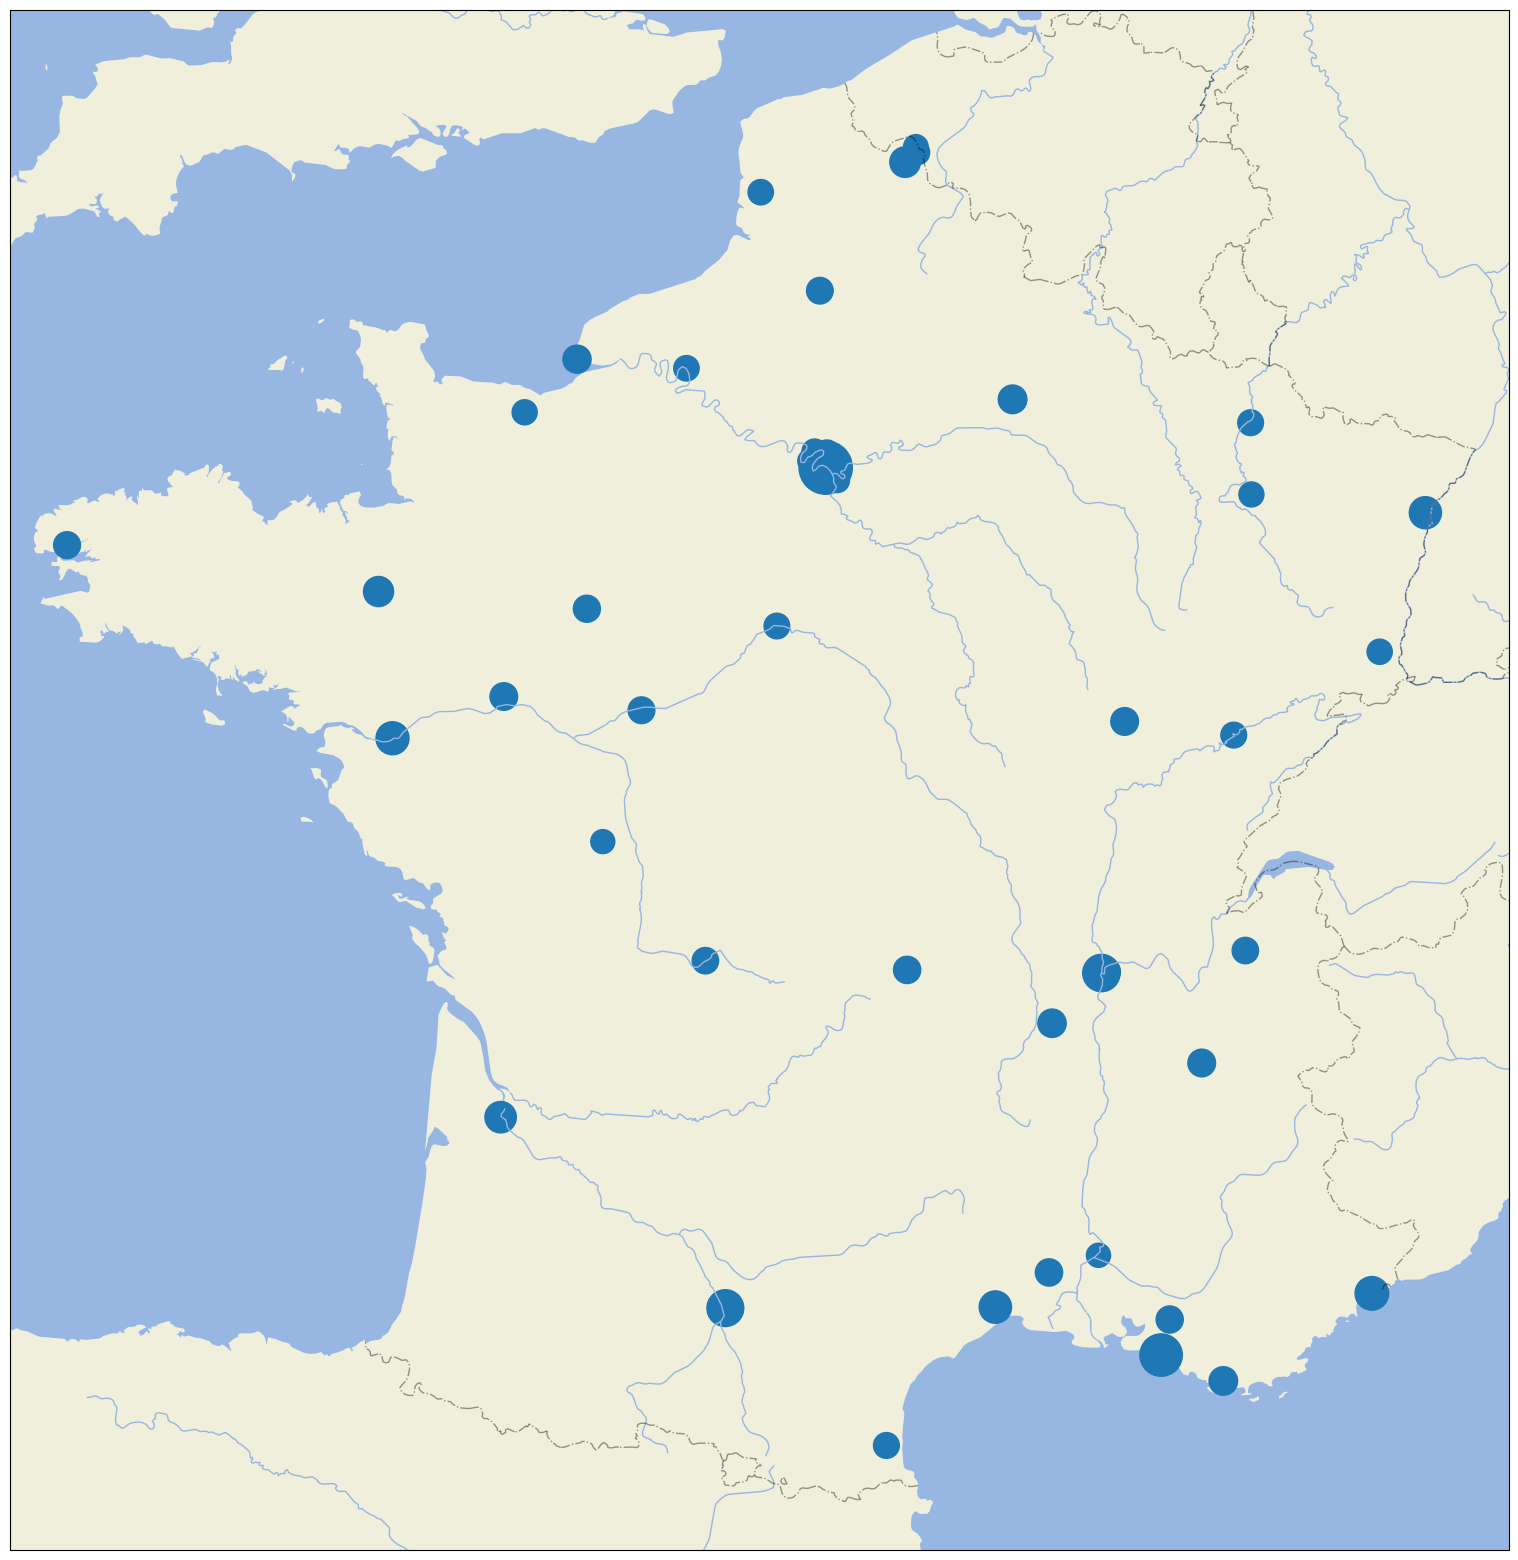

In [143]:
plt.figure(figsize=(20,20))
plt.subplot(projection=ccrs.Mercator()).set_extent([-5, 8.5, 42, 51.5], crs=ccrs.PlateCarree())
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.LAND)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.OCEAN)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.RIVERS)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.LAKES)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.BORDERS,linestyle='-.',alpha=0.4)
plt.scatter(x=df50.longitude,y=df50.latitude,s=df50['scaled_pop'],transform=ccrs.PlateCarree())

In [107]:
df50['scaled_pop']=df50['Population, 2019'].apply(np.sqrt)

In [129]:
df50.to_csv('data/cities50.csv')

In [131]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [130]:
df50=pd.read_csv('data/cities50.csv')

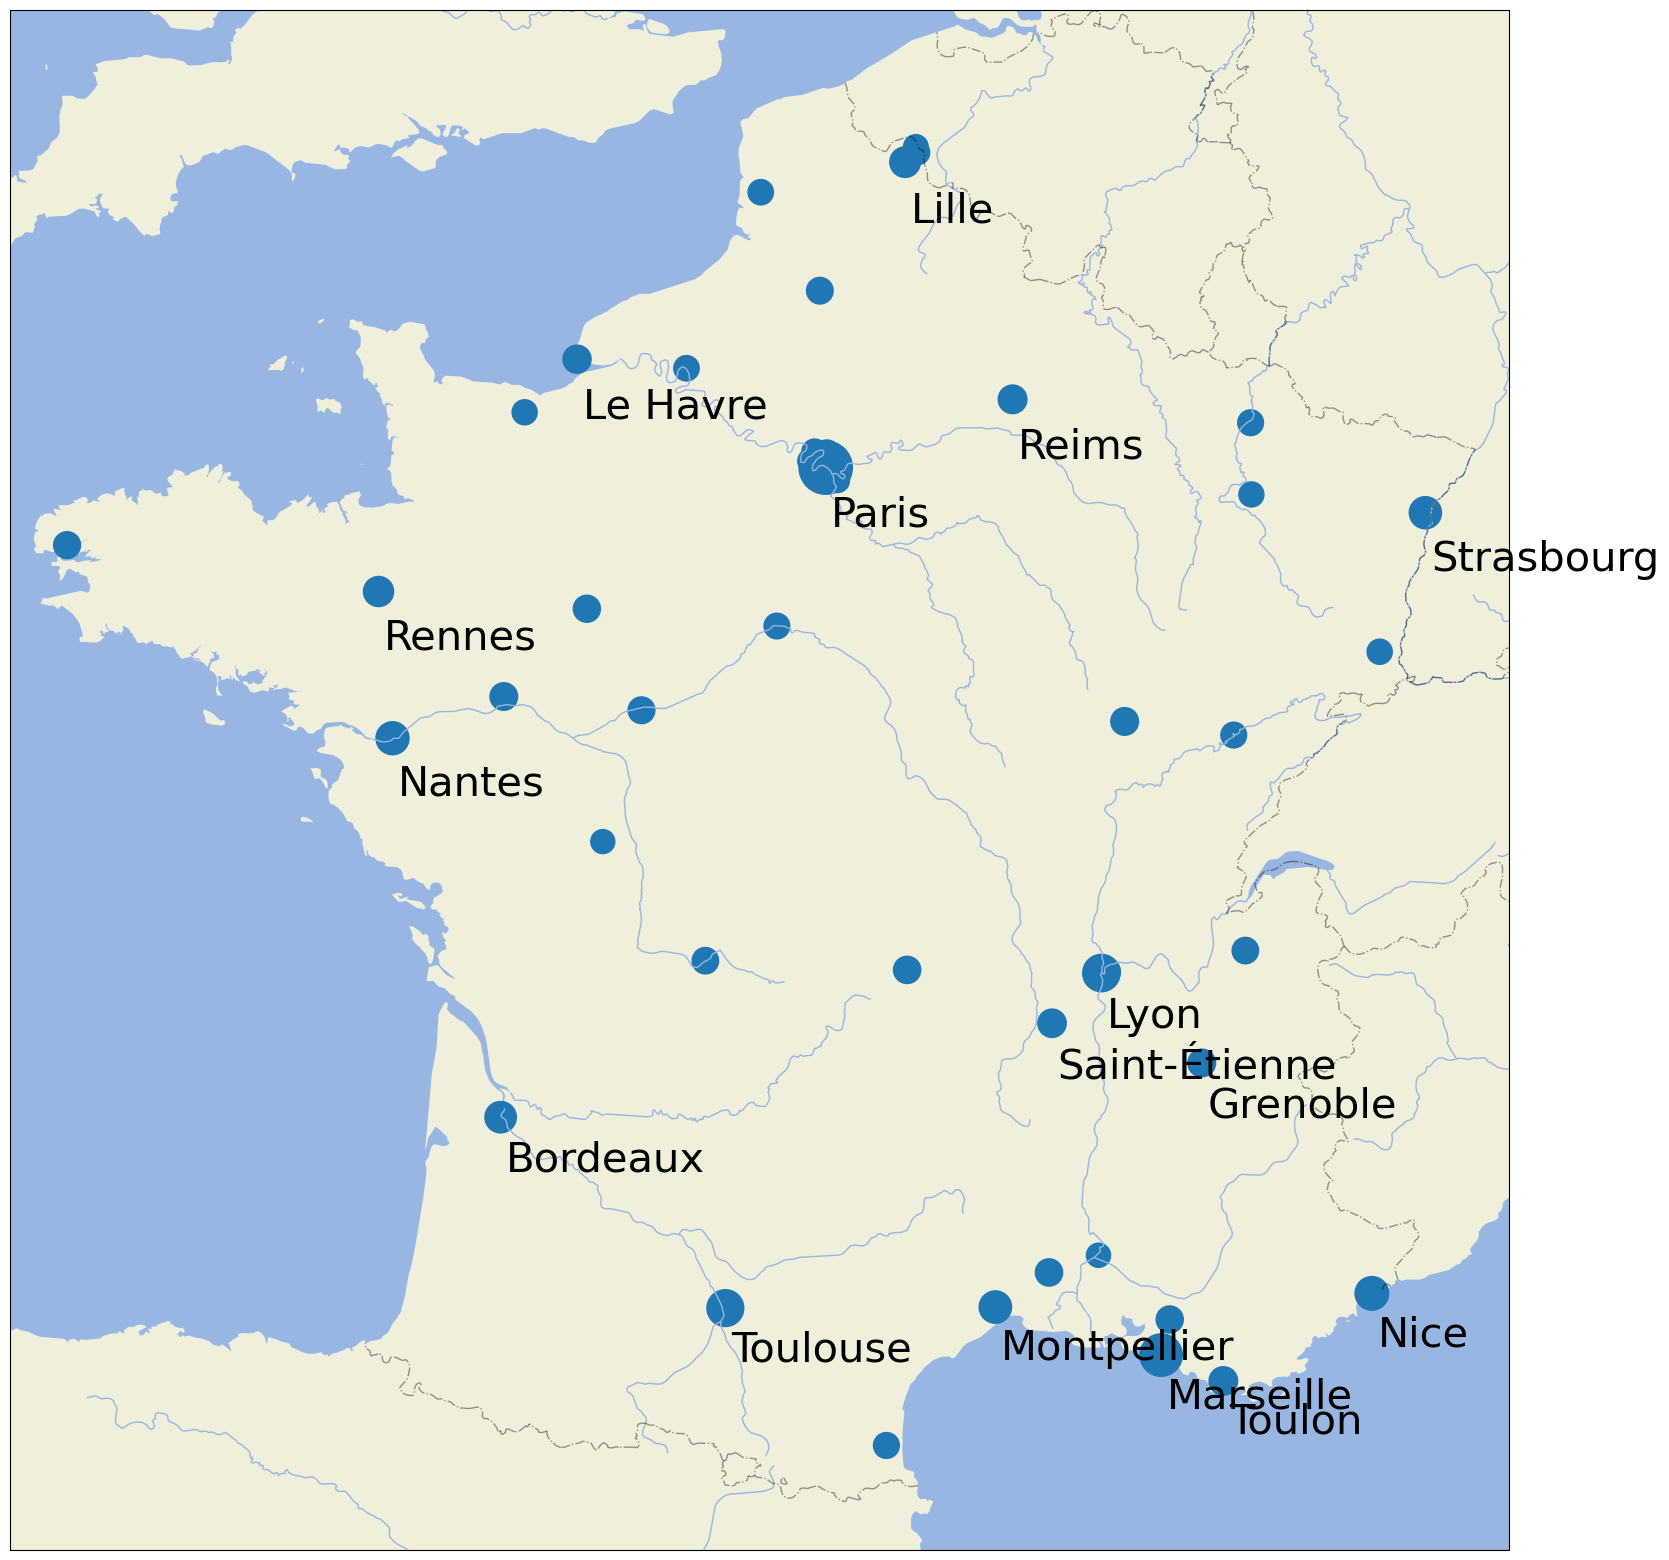

In [145]:
plt.figure(figsize=(20,20))
plt.subplot(projection=ccrs.Mercator()).set_extent([-5, 8.5, 42, 51.5], crs=ccrs.PlateCarree())
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.LAND)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.OCEAN)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.RIVERS)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.LAKES)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.BORDERS,linestyle='-.',alpha=0.4)
plt.scatter(x=df50.longitude,y=df50.latitude,s=df50['scaled_pop'],transform=ccrs.PlateCarree())

cities=df50.nlargest(16, ['Population, 2019'])
for i, txt in enumerate(cities['Commune']):
    plt.annotate(txt, (cities['longitude'].loc[i]+0.05, cities['latitude'].loc[i]-0.35),xycoords=ccrs.PlateCarree(),fontsize=30)


### Tiles

In [134]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import GoogleTiles
import pandas as pd

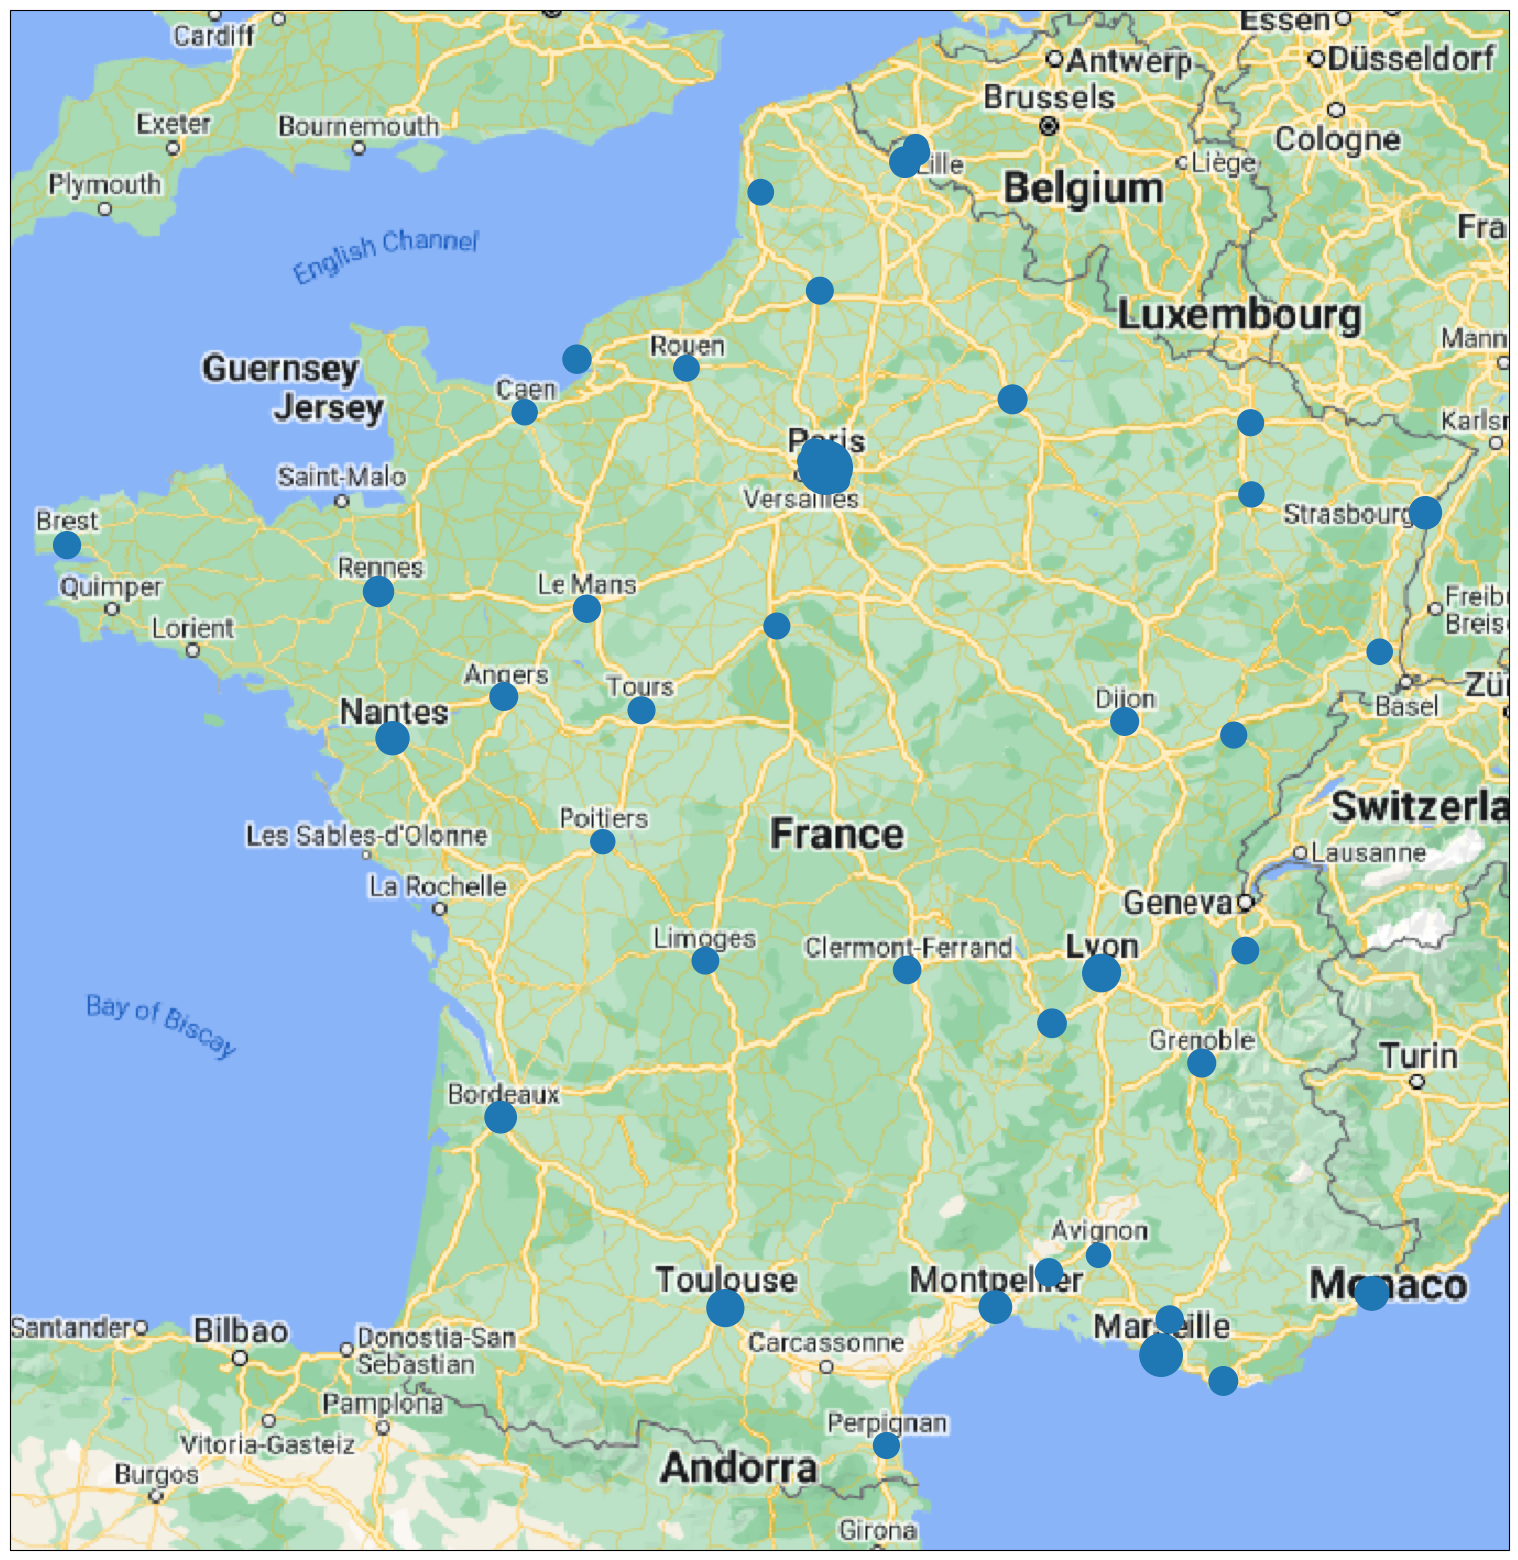

In [150]:
plt.figure(figsize=(20,20))
tiler = GoogleTiles(style="street")
plt.subplot(projection=ccrs.Mercator()).add_image(tiler,6)
plt.subplot(projection=ccrs.Mercator()).set_extent([-5, 8.5, 42, 51.5], crs=ccrs.PlateCarree())
plt.scatter(x=df50.longitude,y=df50.latitude,s=df50['scaled_pop'],transform=ccrs.PlateCarree())

### External data

In [33]:
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import numpy as np

In [34]:
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries_gen = reader.records()
countries = [country for country in countries_gen]

In [35]:
europe = [ country for country in countries if (country.attributes["CONTINENT"].strip('\x00')=='Europe') and (country.attributes["GDP_MD"] > 100) ]

In [36]:
europe[0].attributes['NAME']

'France\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [37]:
data = {key: [country.attributes[key] for country in europe] for key in ['NAME', 'GDP_MD', 'POP_EST']}
df=pd.DataFrame(data)
df.head()

NAME   GDP_MD      POP_EST
0  France                         2715518   67059887.0
1  Ukraine                         153781   44385155.0
2  Belarus                          63080    9466856.0
3  Lithuania                        54627    2786844.0
4  Russia                         1699876  144373535.0

In [38]:
df['GDP_per_capita']=round(1_000_000.0 * df['GDP_MD']/df['POP_EST'])
df=df.sort_values(by=['GDP_per_capita'], ascending=False).reset_index(drop=True)
df.reset_index(inplace=True)
df.head()

index                           NAME  GDP_MD    POP_EST  GDP_per_capita
0      0  Monaco                           7188    38964.0        184478.0
1      1  Liechtenstein                    6876    38019.0        180857.0
2      2  Luxembourg                      71104   619896.0        114703.0
3      3  Isle of Man                      7491    84584.0         88563.0
4      4  Switzerland                    703082  8574832.0         81994.0

In [39]:
colors=plt.get_cmap('RdYlBu')(np.linspace(0.1,0.9,len(df)))
colors[:5]

array([[0.83929258, 0.18454441, 0.15286428, 1.        ],
       [0.85874664, 0.22106882, 0.1680123 , 1.        ],
       [0.87658593, 0.25859285, 0.18523645, 1.        ],
       [0.89888504, 0.30549789, 0.20676663, 1.        ],
       [0.91672434, 0.34302191, 0.22399077, 1.        ]])

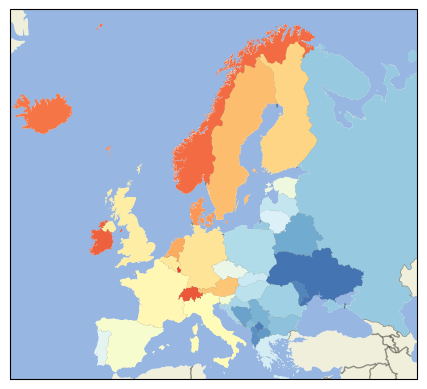

In [62]:
plt.subplot(projection=ccrs.Mercator()).set_extent([-25, 50, 35, 72], crs=ccrs.PlateCarree())
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.LAND)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.OCEAN)
plt.subplot(projection=ccrs.Mercator()).add_feature(cfeature.BORDERS,alpha=0.4)
for country in europe:
    row=df.loc[df['NAME']==country.attributes['NAME']]
    color=colors[row.values[0][0]]
    plt.subplot(projection=ccrs.Mercator()).add_geometries([country.geometry], ccrs.PlateCarree(),facecolor=color, label=country.attributes['ADM0_A3'])
   